In [434]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Interpretation of the model, training

## Load dataset

In [435]:
df = pd.read_csv("data/SAheart.data")
print(f"Shape of dataset: {df.shape}")
print("Head of dataset:")
df.head()

Shape of dataset: (462, 11)
Head of dataset:


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Categorical to numerical

In [436]:
df.drop(columns=["row.names"], axis=1, inplace=True)

le = LabelEncoder()
df["famhist"]= le.fit_transform(df["famhist"])
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [437]:
X = df.drop(columns=["chd"], axis=1)
y = df["chd"]

## EDA - before split

y classes ratio: 0.654


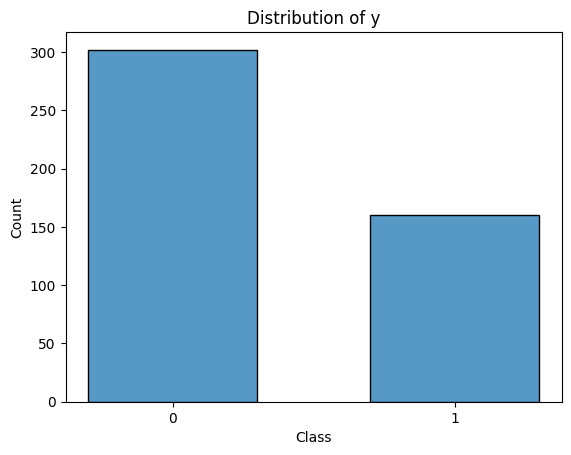

In [438]:

print(f"y classes ratio: {np.round(np.unique(y, return_counts=True)[1][0] / np.sum(np.unique(y, return_counts=True)[1]), 3)}")

f = sns.histplot(data=y,  discrete=True, binwidth=0.3, shrink=0.6)

f.set_xticks(np.arange(0, 1.001, step=1))

plt.title("Distribution of y")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

## EDA - after split

y_train classes ratio: 0.653
y_test classes ratio: 0.656


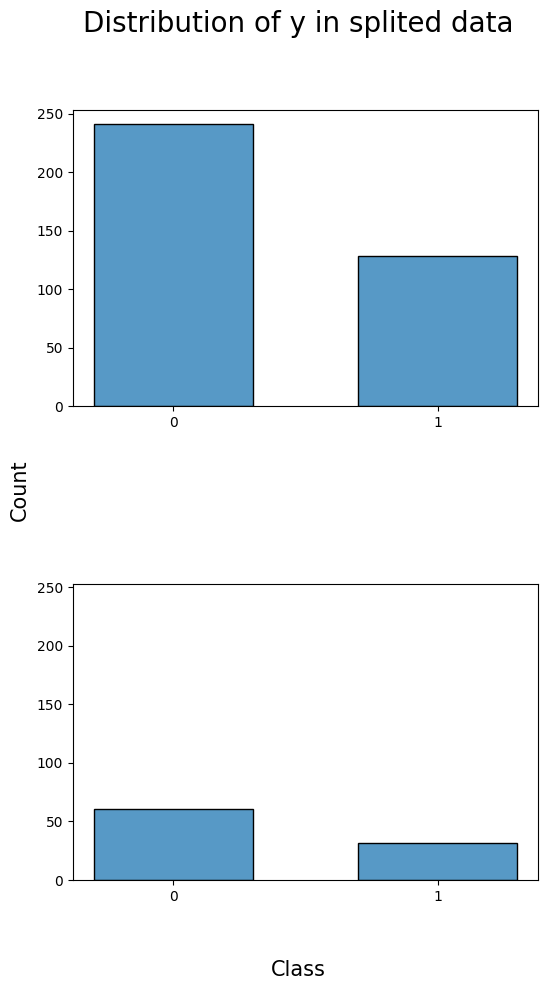

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, stratify=y)

print(f"y_train classes ratio: {np.round(np.unique(y_train, return_counts=True)[1][0] / np.sum(np.unique(y_train, return_counts=True)[1]), 3)}")
print(f"y_test classes ratio: {np.round(np.unique(y_test, return_counts=True)[1][0] / np.sum(np.unique(y_test, return_counts=True)[1]), 3)}")
 

fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharey=True)

f = sns.histplot(data=y_train, discrete=True, binwidth=0.3, shrink=0.6, ax=axes[0])
axes[0].set_xticks(np.arange(0, 1.001, step=1))
axes[0].set(title="", ylabel="", xlabel="")

f = sns.histplot(data=y_test, discrete=True, binwidth=0.3, shrink=0.6, ax=axes[1])
axes[1].set_xticks(np.arange(0, 1.001, step=1))
axes[1].set(title="", ylabel="", xlabel="")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
fig.suptitle("Distribution of y in splited data", fontsize=20)
fig.supxlabel("Class", fontsize=15)
fig.supylabel("Count", fontsize=15)

plt.show()

## Fit model

In [440]:
lr = LogisticRegression(penalty="none", max_iter=1000)
lr = lr.fit(X_train, y_train)

##### Dataset of all variables including information, which of those are significant

In [441]:
pd.DataFrame({
"variable": X.columns.values,
"coef": np.round(lr.coef_[0], 4),
"exp_coef": np.round(np.exp(lr.coef_[0]), 4),
"is_important": (np.round(np.exp(lr.coef_[0]), 2) - 1) > 0
})

,variable,coef,exp_coef,is_important
0,sbp,0.0105,1.0106,True
1,tobacco,0.0773,1.0804,True
2,ldl,0.1961,1.2166,True
3,adiposity,0.0507,1.0520,True
4,famhist,0.9208,2.5112,True
5,typea,0.0365,1.0372,True
6,obesity,-0.1049,0.9004,False
7,alcohol,-0.0014,0.9986,False
8,age,0.0362,1.0369,True


#### Interpreterion of the coeficient corresponding to Age variable

By increasing variable Age by one, the odds that the patient will have heart attack are 1.520 times as large as the odds that the patient will not have heart attack when all other variables are held constant

#### Probablity of the hear attack for the first patient

In [442]:
np.round(lr.predict_proba(X)[0, 1], 3)

0.677

# 2. Problem of linearly separable classes

## Load dataset

In [443]:
df = pd.read_csv("data/earthquake.txt", sep=" ")
print(f"Shape of dataset: {df.shape}")
print("Head of dataset:")
df.head()

Shape of dataset: (29, 3)
Head of dataset:


,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


## Linear separability

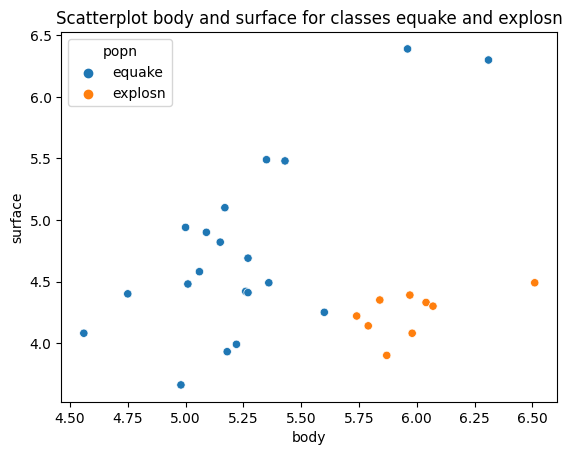

In [444]:
f = sns.scatterplot(data=df, x="body", y="surface", hue="popn")
plt.title("Scatterplot body and surface for classes equake and explosn")
plt.show()

## Categorical to numerical

In [445]:
le = LabelEncoder()
df["popn"]= le.fit_transform(df["popn"])
df.head()

,popn,body,surface
0,0,5.60,4.25
1,0,5.18,3.93
2,0,6.31,6.30
3,0,5.36,4.49
4,0,5.96,6.39


In [446]:
X = df.drop(columns=["popn"], axis=1)
y = df["popn"]
X.head()

,body,surface
0,5.60,4.25
1,5.18,3.93
2,6.31,6.30
3,5.36,4.49
4,5.96,6.39


## Fit model

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, stratify=y)


lr = LogisticRegression(penalty="none", max_iter=1000)
lr = lr.fit(X_train, y_train)

In [448]:
pd.DataFrame({
"variable": X.columns.values,
"coef": np.round(lr.coef_[0], 4),
"exp_coef": np.round(np.exp(lr.coef_[0]), 4),
"is_important": (np.round(np.exp(lr.coef_[0]), 2) - 1) > 0
})

,variable,coef,exp_coef,is_important
0,body,288.3182,1.640524e+125,True
1,surface,-332.0118,0.000000e+00,False


Logistic regression cannot be used for linear seperable dataset, so thats the reason why those coefficients behave uncommonly

# Simulation example

In [449]:
betas = np.array([0.5, 1, 1])

def generate_data(n):
    X =  np.concatenate([np.array([np.ones(shape=n)]), np.random.normal(size=(2, n), loc=0, scale=1)]).T
    p = 1 / (1 + np.exp(-np.sum(betas * X, axis=1)))

    y = np.random.binomial(n=1, p=p)

    return X[:, [1, 2]], y

#### For n = 100


In [450]:
L = 100
mses = []
for j in range(L):
    X, y = generate_data(50)
    lr = LogisticRegression(penalty="none")
    lr = lr.fit(X, y)
    mse = mean_squared_error(betas, np.concatenate([lr.intercept_, lr.coef_[0]]))
    mses.append(mse)

print(f"Avg mse: {np.mean(mses)}")
print(f"Min mse: {np.min(mses)}")
print(f"Q1 mse: {np.quantile(mses, 0.25)}")
print(f"Median mse: {np.median(mses)}")
print(f"Q3 mse: {np.quantile(mses, 0.75)}")
print(f"Max mse: {np.max(mses)}")

Avg mse: 0.23684739962396428
Min mse: 0.012805849846250083
Q1 mse: 0.07397805788275205
Median mse: 0.13415525760778707
Q3 mse: 0.23807002877274205
Max mse: 2.5682469261795724


#### For list of n

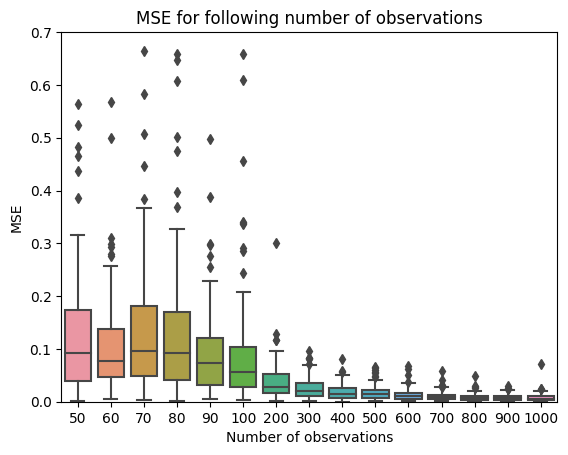

In [451]:
L = 100
list_of_n = [50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
all_mses = []

for i, n in enumerate(list_of_n):
    mses = []
    for j in range(L):
        X, y = generate_data(n)
        lr = LogisticRegression(penalty="none")
        lr = lr.fit(X, y)
        mse = mean_squared_error(betas, np.concatenate([lr.intercept_, lr.coef_[0]]))
        mses.append(mse)
    all_mses.append(mses)

df_mses = pd.DataFrame(
    np.matrix(all_mses).T, 
    columns=[str(x) for x in [50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]]
)

f = sns.boxplot(data=df_mses)
f.set_ylim(bottom=0, top=0.7)

plt.title("MSE for following number of observations")
plt.ylabel("MSE")
plt.xlabel("Number of observations")

plt.savefig("plots/LogisticSimulatedData1")
plt.show()